<a href="https://colab.research.google.com/github/tmelo-uea/cursos/blob/main/CursoAnaliseImagensMedicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries when needed
import os
import numpy as np
import pandas as pd
import pathlib
import imageio

In [2]:
# Exploring dataset
base_dir = '/content/drive/MyDrive/cursos2024/code/chest_xray_menor/'
base_dir = '/content/drive/MyDrive/cursos2024/code/chest_xray/'

train_pneumonia_dir = base_dir+'train/PNEUMONIA/'
train_normal_dir=base_dir+'train/NORMAL/'

test_pneumonia_dir = base_dir+'test/PNEUMONIA/'
test_normal_dir = base_dir+'test/NORMAL/'

val_normal_dir= base_dir+'val/NORMAL/'
val_pnrumonia_dir= base_dir+'val/PNEUMONIA/'

train_pn = [train_pneumonia_dir+"{}".format(i) for i in os.listdir(train_pneumonia_dir) ]
train_normal = [train_normal_dir+"{}".format(i) for i in os.listdir(train_normal_dir) ]

test_normal = [test_normal_dir+"{}".format(i) for i in os.listdir(test_normal_dir)]
test_pn = [test_pneumonia_dir+"{}".format(i) for i in os.listdir(test_pneumonia_dir)]

val_pn= [val_pnrumonia_dir+"{}".format(i) for i in os.listdir(val_pnrumonia_dir) ]
val_normal= [val_normal_dir+"{}".format(i) for i in os.listdir(val_normal_dir) ]

print ("Total images:",len(train_pn+train_normal+test_normal+test_pn+val_pn+val_normal))
print ("Total pneumonia images:",len(train_pn+test_pn+val_pn))
print ("Total normal images:",len(train_normal+test_normal+val_normal))

Total images: 5866
Total pneumonia images: 4283
Total normal images: 1583


In [3]:
# Dataset Splitting (train 80% , test 15% and validation 5% )

# Gathering all pneumina and normal chest X-ray in two python list
#pn = train_pn + test_pn + val_pn
#normal = train_normal + test_normal + val_normal

# Spliting dataset in train set,test set and validation set.

#train_imgs = pn[:3418]+ normal[:1224]  # 80% of 4273 Pneumonia and normal chest X-ray are 3418 and 1224 respectively.
#test_imgs = pn[3418:4059]+ normal[1224:1502]
#val_imgs = pn[4059:] + normal[1502:]
train_imgs = train_pn + train_normal  # 80% of 4273 Pneumonia and normal chest X-ray are 3418 and 1224 respectively.
test_imgs = test_pn + test_normal
val_imgs = val_pn + val_normal

#print("Total Train Images %s containing %s pneumonia and %s normal images"
#      % (len(train_imgs),len(pn),len(normal)))
#print("Total Test Images %s containing %s pneumonia and %s normal images"
#      % (len(test_imgs),len(pn),len(normal)))
#print("Total validation Images %s containing %s pneumonia and %s normal images"
#      % (len(val_imgs),len(pn),len(normal)))
#print("Total Train Images %s containing %s pneumonia and %s normal images"
#      % (len(train_imgs),len(pn[:3418]),len(normal[:1224])))
#print("Total Test Images %s containing %s pneumonia and %s normal images"
#      % (len(test_imgs),len(pn[3418:4059]),len(normal[1224:1502])))
#print("Total validation Images %s containing %s pneumonia and %s normal images"
#      % (len(val_imgs),len(pn[4059:]),len(normal[1502:])))



import random

random.shuffle(train_imgs)
random.shuffle(test_imgs)
random.shuffle(val_imgs)

In [4]:
#import random
#train_imgs = pn + normal
#test_imgs = pn + normal
#val_imgs = pn + normal
#random.shuffle(train_imgs)
#random.shuffle(test_imgs)
#random.shuffle(val_imgs)

print (len(train_imgs))
print (len(test_imgs))
print (len(val_imgs))

5216
634
16


In [5]:
#showing a file name from test set
print(test_imgs[5])

/content/drive/MyDrive/cursos2024/code/chest_xray/test/PNEUMONIA/person1664_virus_2877.jpeg


In [6]:
import cv2
img_size = 224

def preprocess_image(image_list):

    X = [] # images
    y = [] #labels (0 for Normal or 1 for Pneumonia)
    count=0

    for image in image_list:

        try:

            img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)

            img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)

            #convert image to 2D to 3D
            img = np.dstack([img, img, img])

            #convrt greyscale image to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Normalalize Image
            img = img.astype(np.float32)/255.

            count=count+1

            X.append(img)


        except:
            continue
        #get the labels
        if 'NORMAL' in image:
            y.append(0)

        elif 'IM' in image:
            y.append(0)

        elif 'virus' or 'bacteria' in image:
            y.append(1)


    return X, y

In [7]:
X, y = preprocess_image(train_imgs)

In [8]:
# Check all the images getting labels or not
arr=y
uniqueValues, occurCount = np.unique(arr, return_counts=True)

print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [1341 3875]


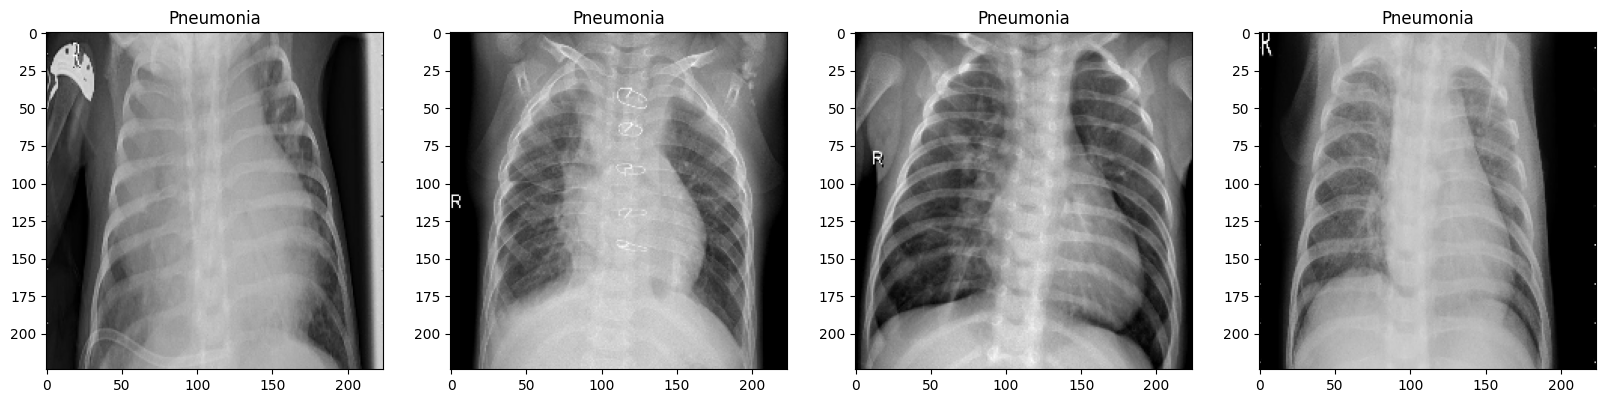

In [9]:
# Display some images from train set
# Feel free to show more image by changing the values

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (y[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(X[i])
    k=k+1;

In [10]:
# get the labels for test set

P, t = preprocess_image(test_imgs)

In [11]:
arr=t
uniqueValues, occurCount = np.unique(arr, return_counts=True)

print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [234 400]


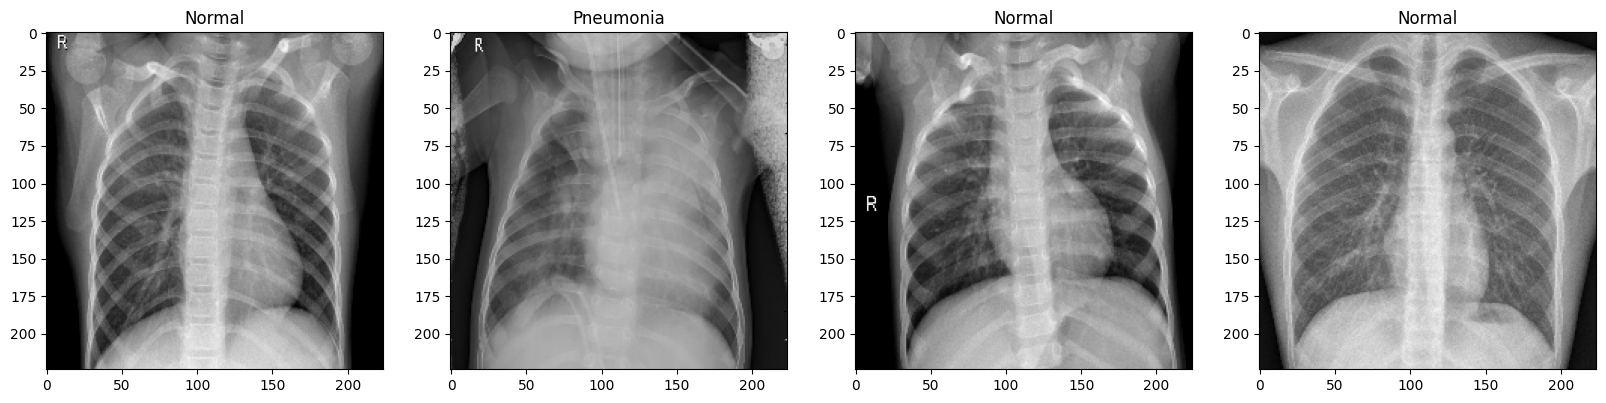

In [12]:
# now displaying some images from test set
# Feel free to show more image by changing the values

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (t[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(P[i])
    k=k+1;

In [13]:
# get the labels for validation set

K, m = preprocess_image(val_imgs)

In [14]:
arr=m


# Get a tuple of unique values & their frequency in numpy array
uniqueValues, occurCount = np.unique(arr, return_counts=True)

print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [8 8]


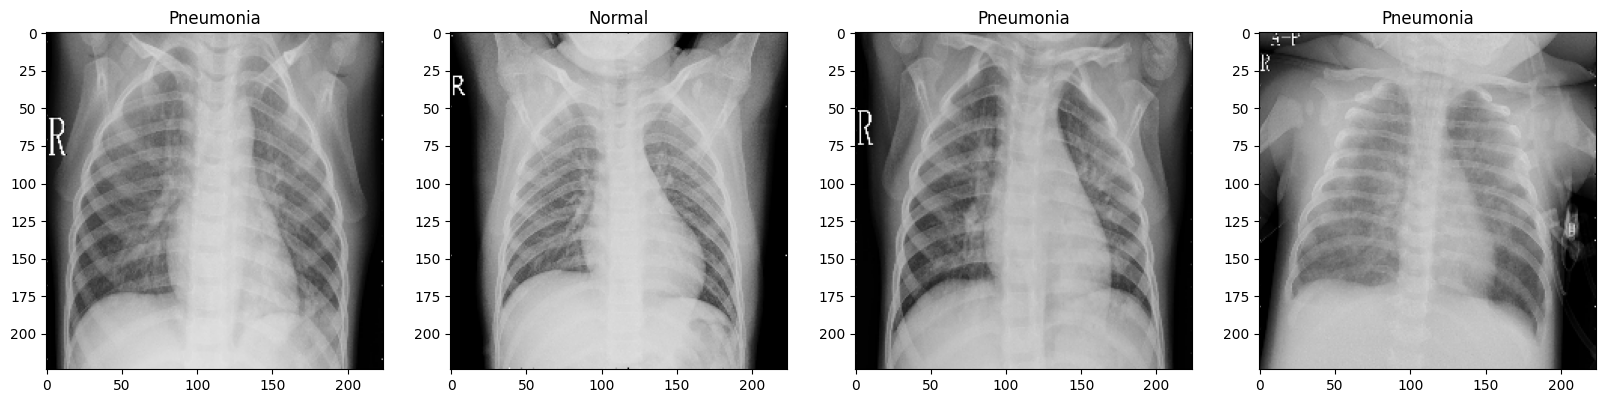

In [15]:
# now displaying some images from validation set
# Feel free to show more image by changing the values

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (m[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(K[i])
    k=k+1;

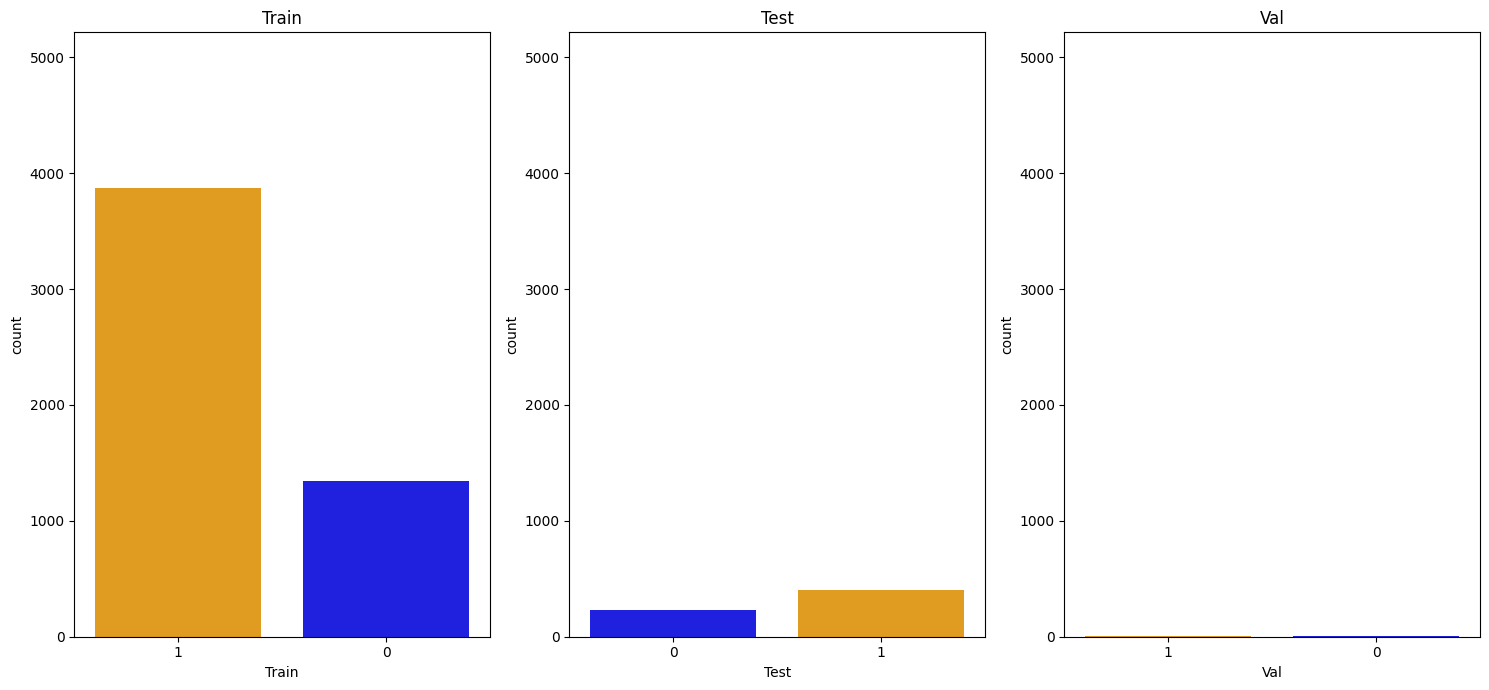

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criando DataFrames separados
df_train = pd.DataFrame({'Train': y})
df_test = pd.DataFrame({'Test': t})
df_val = pd.DataFrame({'Val': m})

# Convertendo valores inteiros para strings para correspondência correta
df_train['Train'] = df_train['Train'].astype(str)
df_test['Test'] = df_test['Test'].astype(str)
df_val['Val'] = df_val['Val'].astype(str)

# Configurando a visualização
fig, ax = plt.subplots(1, 3, figsize=(15, 7))

# Cores para os valores '0' e '1'
palette = {'0': 'blue', '1': 'orange'}

# Plotando os dados de treino com cores específicas
sns.countplot(x='Train', hue='Train', data=df_train, ax=ax[0], palette=palette, legend=False)
ax[0].set_title('Train')
ax[0].set_ylim(0, len(df_train))  # Ajuste conforme necessário para melhor visualização

# Plotando os dados de teste com cores específicas
sns.countplot(x='Test', hue='Test', data=df_test, ax=ax[1], palette=palette, legend=False)
ax[1].set_title('Test')
ax[1].set_ylim(0, len(df_train))  # Ajuste conforme necessário para melhor visualização

# Plotando os dados de validação com cores específicas
sns.countplot(x='Val', hue='Val', data=df_val, ax=ax[2], palette=palette, legend=False)
ax[2].set_title('Val')
ax[2].set_ylim(0, len(df_train))  # Ajuste conforme necessário para melhor visualização

plt.tight_layout()
plt.show()


In [17]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y = np.array(y)  # Garantindo que 'y' é um array numpy, ajuste conforme necessário

# Verificando a versão do sklearn e ajustando a função compute_class_weight
try:
    # Tentativa de usar a função compute_class_weight se disponível
    class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights = dict(enumerate(class_weights))
except AttributeError:
    # Se compute_class_weight foi descontinuada, usando uma alternativa
    from sklearn.utils import compute_sample_weight
    class_weights = compute_sample_weight(class_weight='balanced', y=y)
    unique_classes = np.unique(y)
    class_weights = {cls: np.mean(class_weights[y == cls]) for cls in unique_classes}

print(class_weights)


{0: 1.9448173005219984, 1: 0.6730322580645162}


In [18]:
import seaborn as sns
import gc

train_imgs = train_pn[:3875]+ train_normal[:1341]
del train_imgs
gc.collect()

X_train = np.array(X)
y_train = np.array(y)
X_test = np.array(P)
y_test = np.array(t)
X_val = np.array(K)
y_val = np.array(m)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(5216, 224, 224, 3)
(5216,)
(634, 224, 224, 3)
(634,)
(16, 224, 224, 3)
(16,)


In [19]:
# clear memory
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=7,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     shear_range=0.2,
                                     zoom_range=0.45,
                                     horizontal_flip=True)

val_datagen = ImageDataGenerator(zoom_range=0.45)

In [21]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [22]:
# Set image Size
img_size =224

In [23]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import *
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from keras import backend as K

# Create the base pre-trained model
# Weights should be none becuase we don't need to train with any pre-trained weights here

base_model = MobileNet(weights=None, include_top=False,input_shape=(img_size, img_size, 3))

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# Compile model
model.compile(optimizer='adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])

In [24]:
# We can see details of  MobileNet architecure's details
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [25]:
# Calculando os valores corretos para steps_per_epoch e validation_steps
steps_per_epoch = max(1, ntrain // batch_size)
validation_steps = max(1, nval // batch_size)

# Usando Model.fit com um gerador
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=64,
    validation_data=val_generator,
    validation_steps=validation_steps,
    class_weight=class_weights
)


Epoch 1/64
163/163 [==============================] - 95s 461ms/step - loss: 0.3711 - binary_accuracy: 0.8376 - mae: 0.2078 - val_loss: 3.5331 - val_binary_accuracy: 0.5000 - val_mae: 0.5000
Epoch 2/64
163/163 [==============================] - 72s 443ms/step - loss: 0.2723 - binary_accuracy: 0.8861 - mae: 0.1535 - val_loss: 4.7276 - val_binary_accuracy: 0.5000 - val_mae: 0.5000
Epoch 3/64
163/163 [==============================] - 74s 451ms/step - loss: 0.2552 - binary_accuracy: 0.8907 - mae: 0.1482 - val_loss: 6.3605 - val_binary_accuracy: 0.5000 - val_mae: 0.5000
Epoch 4/64
163/163 [==============================] - 72s 442ms/step - loss: 0.2388 - binary_accuracy: 0.8982 - mae: 0.1362 - val_loss: 5.2659 - val_binary_accuracy: 0.5000 - val_mae: 0.4998
Epoch 5/64
163/163 [==============================] - 72s 442ms/step - loss: 0.2338 - binary_accuracy: 0.9026 - mae: 0.1311 - val_loss: 0.4119 - val_binary_accuracy: 0.8125 - val_mae: 0.2189
Epoch 6/64
163/163 [=========================

In [26]:
# We train for 64 epochs
#history = model.fit_generator(train_generator,
#                              steps_per_epoch=ntrain // batch_size,
#                              epochs=64,
#                              validation_data=val_generator,
#                              validation_steps=nval // batch_size,
#                              class_weight =class_weights,
#)

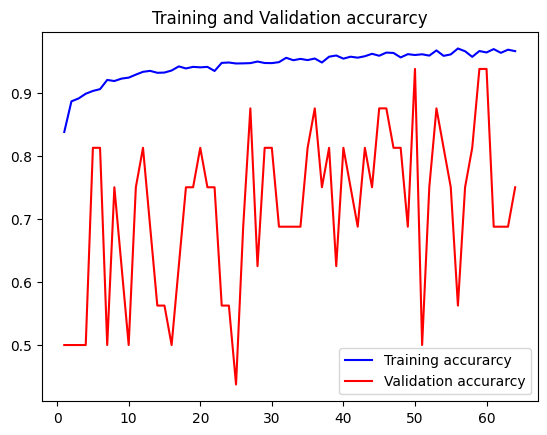

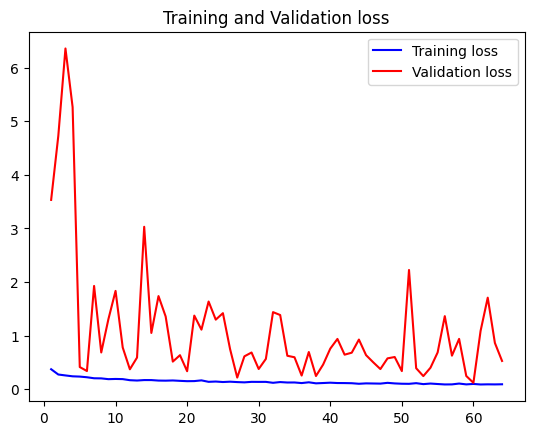

In [27]:
# Lets plot the train and val curve
# Get the details form the history object
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(X_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['binary_accuracy'][-1])*100, 2)))


20/20 [==============================] - 2s 78ms/step
CONFUSION MATRIX ------------------
[[185  49]
 [ 13 387]]

============TEST METRICS=============
Accuracy: 90.22082018927445%
Precision: 88.76146788990825%
Recall: 96.75%
F1-score: 92.58373205741626

TRAIN METRIC ----------------------
Train acc: 96.57


<Axes: >

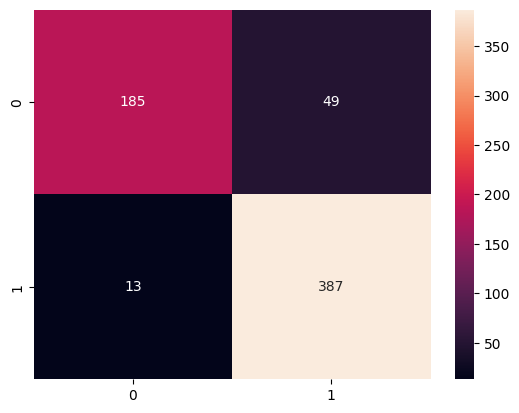

In [29]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d",)

AUC Score: 0.9642521367521368


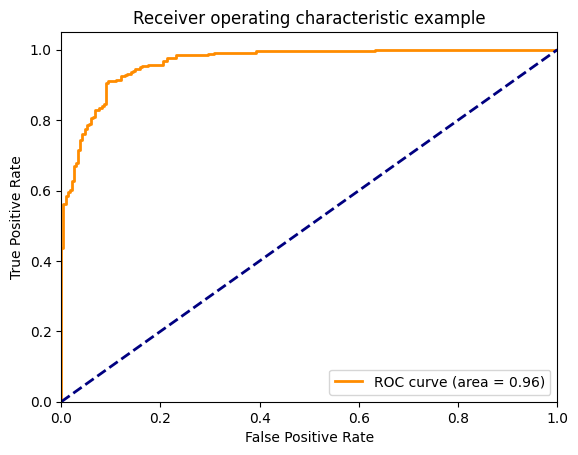

In [30]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

fpr , tpr , thresholds = roc_curve ( y_test , preds)
auc_keras = auc(fpr, tpr)
print("AUC Score:",auc_keras)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()